In [ ]:
# !git clone https://github.com/utshabkg/ML_Competition-AND-Practice.git

In [ ]:
%cd '/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset/'

/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import random
from tqdm import tqdm
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset/test.csv')
train.shape, test.shape

((1399, 8), (600, 6))

In [ ]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


### Split damaged and undamaged images

In [ ]:
train['Condition'].isnull().sum()

0

In [ ]:
damaged = 'trainImages/damaged'
undamaged = 'trainImages/undamaged'
if not os.path.exists(undamaged):
    os.mkdir(undamaged)
if not os.path.exists(damaged):
    os.mkdir(damaged)

In [ ]:
import shutil
j = 0
for i in train['Condition']:
    image = train.loc[j, 'Image_path']
    if i==0:
        shutil.copy(f'trainImages/{image}', f'trainImages/undamaged/{image}')
    else:
        shutil.copy(f'trainImages/{image}', f'trainImages/damaged/{image}')
    if (j+1) % 200 == 0:
        print(f'{j+1} images are done')
    j += 1
print('Train images are splited')

200 images are done
400 images are done
600 images are done
800 images are done
1000 images are done
1200 images are done
Train images are splited


In [ ]:
train_damaged = os.listdir(damaged)
train_undamaged = os.listdir(undamaged)

In [ ]:
def plot_bar(class_labels, counts, name):
    plt.figure(figsize = (5,5))
    f = sns.barplot(x = classes, y =counts)
    plt.xlabel("Class labels", fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title("Number of Images in "+name+' folder', fontsize=15)
    plt.show()

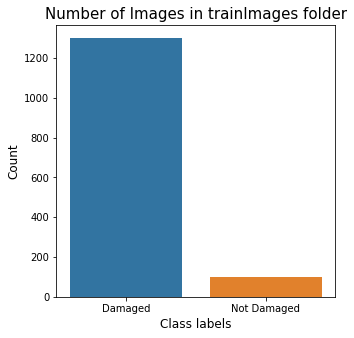

Number of Damaged images in trainImages is 1300
Number of Not Damaged images in trainImages is 99


In [ ]:
classes = ['Damaged', 'Not Damaged']
counts = [len(train_damaged), len(train_undamaged)]
plot_bar(classes, counts, 'trainImages')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in trainImages is '+str(counts[i]))

# Imbalance!!!

>  LCM of 1300 and 99 is 128700



In [ ]:
damaged_aug = 'trainImages/damaged_aug'
undamaged_aug = 'trainImages/undamaged_aug'
if not os.path.exists(undamaged_aug):
    os.mkdir(undamaged_aug)
if not os.path.exists(damaged_aug):
    os.mkdir(damaged_aug)

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

path = Path('trainImages')
path_hr = path/'damaged'
il = ImageList.from_folder(path_hr)
path_hr = path/'damaged_aug'
tfms = get_transforms(max_rotate=25)

k = 1
def data_aug_one(ex_img, prox, qnt):
   for lop in range(0, qnt):
      image_name = str(prox).zfill(8) +'.jpg'
      dest = path_hr/image_name
      prox = prox + 1
      new_img = open_image(ex_img)
      new_img_fin = new_img.apply_tfms(tfms[0], new_img, xtra={tfms[1][0].tfm: {"size": 224}}, size=224)
      if not os.path.exists(dest):
          new_img_fin.save(dest)
    print(k)
    k += 1

prox = 1300
qnt = 99
for imagen in il.items:
   data_aug_one(imagen, prox, qnt)
   prox = prox + qnt

In [ ]:
path = Path('trainImages')
path_hr = path/'undamaged'
il = ImageList.from_folder(path_hr)
path_hr = path/'undamaged_aug'
tfms = get_transforms(max_rotate=25)

k = 1
def data_aug_one(ex_img, prox, qnt):
   for lop in range(0, qnt):
      image_name = str(prox).zfill(8) +'.jpg'
      dest = path_hr/image_name
      prox = prox + 1
      new_img = open_image(ex_img)
      new_img_fin = new_img.apply_tfms(tfms[0], new_img, xtra={tfms[1][0].tfm: {"size": 224}}, size=224)
      new_img_fin.save(dest)
      if not os.path.exists(dest):
          new_img_fin.save(dest)
    print(k)
    k += 1
prox = 99
qnt = 1300
for imagen in il.items:
   data_aug_one(imagen, prox, qnt)
   prox = prox + qnt